In [39]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

reg = LinearRegression()

crab = pd.read_csv('./data/CrabAgePrediction.csv')

In [40]:
crab.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


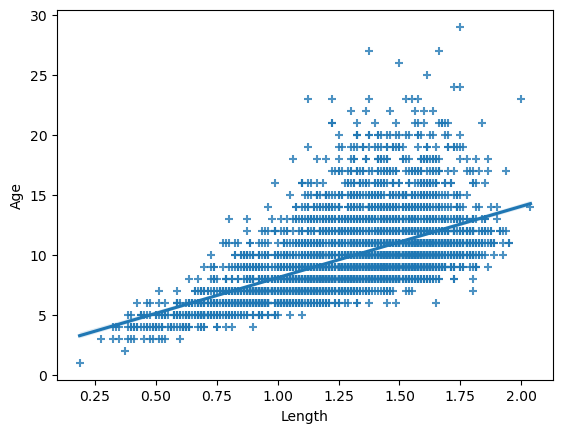

In [41]:
sns.regplot(data=crab, x=crab['Length'], y=crab['Age'], marker='+')
plt.show()

In [42]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias = False)

In [43]:
crab_poly = poly.fit_transform(crab['Length'].values.reshape(-1,1))

In [44]:
# 게의 길이에 따른 나이 예측 모델
# reg.fit(crab['Length'].values.reshape(-1,1), crab['Age'])

reg.fit(crab_poly, crab['Age'])

LinearRegression()

In [45]:
reg.coef_ # 경향성을 파악 가능(혼동 행렬과 같은 역할) == 기울기

array([11.6275777 , -2.33926167])

In [66]:
poly.fit_transform([[.5]])

array([[0.5 , 0.25]])

In [68]:
# 데이터에는 없는 나이 입력해서 나이 예측
# 만약 몸 길이가 10이라면 나이는 61세라는 예측 결과 도출
reg.predict([[.01,.001]])

array([-0.94508336])

In [53]:
y_pred = reg.predict(crab_poly)
df = pd.DataFrame(crab_poly)

<Axes: xlabel='Length'>

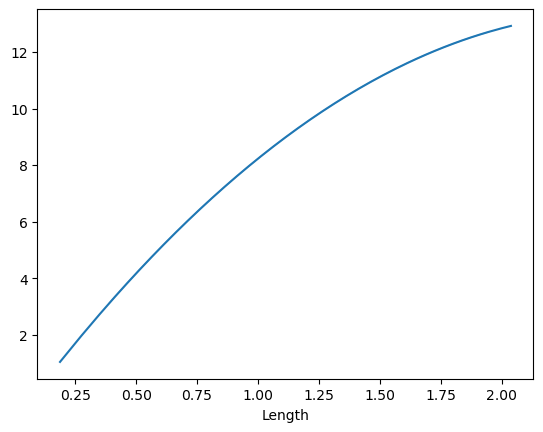

In [65]:
sns.lineplot(data=df, x=crab['Length'], y=y_pred)

선형 회귀는 독립 변수 X와 종속 변수 y가 있을 때, X와 y의 선형 방정식으로 나타내는 회귀분석 기법입니다. 이를 이용하면 예측 또는 두 변수 사이의 관계 검증을 할 수 있습니다. 만약 선형 회귀 분석을 해볼 예정이라면, 우선 데이터가 선형성(linearity)을 보여야 한다는 가정이 필요합니다. 아주 단순하게 설명하자면, 일차함수와 비슷한 경향을 띠면 된다는 말이지요(실제로는 일차함수보다 조금 더 확장된 개념입니다). 그리고 데이터가 등분산성(homoskedasticity)을 보여야 한다는 제약, 오차의 독립성, 다중공선성의 부재 등의 가정이 필요합니다.